# GEOG5990M Final Assignment

Student ID number: 202030269


**Assessing the impacts of future flood risk on vulnerable communities in Leeds.**

# **Non-spatial: Data Description, Statistics and Wrangling**

In [1]:
# Import and install required packages for non-spatial visulisation

# for data manipulation
import pandas as pd
import numpy as np

# for data visulaisation
import seaborn as sns
import matplotlib.pyplot as plt


# Confusion matrix packages for visualising model outcomes
from sklearn import metrics

# OLS model
import statsmodels.api as sm

In [2]:
# Load in CSVs
# For non-spatial visualisation datasets
vehicles = pd.read_csv('car_van_availability1.csv') # Load in csv data containing vehicle availability
age = pd.read_csv('elderly_leeds1.csv') # Load in ages data containing elderly ages and mean age per output area

***Data Description: Car and Van availability***

In [3]:
# Veiw the vehicles dataset
# 2543 rows and 6 x columns
vehicles

City_name  area_code  All-available_cars  no_cars  Perc_no_car  \
0        Leeds  E00056750                 141       35         24.8   
1        Leeds  E00056751                 110       14         12.7   
2        Leeds  E00056752                 200       31         15.5   
3        Leeds  E00056753                 141       66         46.8   
4        Leeds  E00056754                 131       28         21.4   
...        ...        ...                 ...      ...          ...   
2538     Leeds  E00170623                  85       31         36.5   
2539     Leeds  E00170887                 103       13         12.6   
2540     Leeds  E00170888                 116        6          5.2   
2541     Leeds  E00170889                 160       16         10.0   
2542     Leeds  E00170890                 102       20         19.6   

      sum_all_in_area  
0                 158  
1                 162  
2                 249  
3                  84  
4                 141  
...               ...  
2538               71  
2539              151  
2540              173  
2541              260  
2542              104  

[2543 rows x 6 columns]

In [4]:
# Check for null vlaues (missing data)
vehicles.isna().sum()

City_name             0
area_code             0
All-available_cars    0
no_cars               0
Perc_no_car           0
sum_all_in_area       0
dtype: int64

In [5]:
# Veiw the data dtypes
# There are also 3 x ‘int64’ variables containing whole values and 1 x ‘float64’ column containing values with a decimal such as a percentage
vehicles.dtypes

City_name              object
area_code              object
All-available_cars      int64
no_cars                 int64
Perc_no_car           float64
sum_all_in_area         int64
dtype: object

Data description insures data analysis runs smoothly<a href="#ref1">[1]</a>, there are 2x ’object’ variables contain location data such as city name and area codes. The ‘area_code’ column is a common column with the population density data so they can be joined together on this column.

***Car and van availability: Initial visualisation***

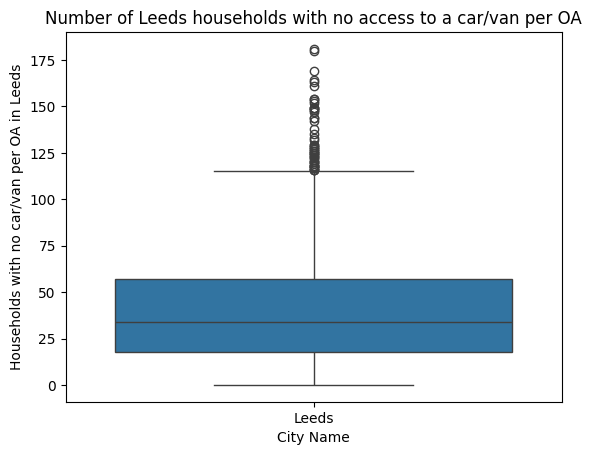

In [6]:
# Create a boxplot showing the variablity in no available cars (percentage of households with no access to a car/van) in Leeds
sns.boxplot(data =vehicles, x = 'City_name', y = 'no_cars')

# Set the plot title
plt.title('Number of Leeds households with no access to a car/van per OA')
# Set the plot x and y labels
plt.xlabel('City Name')
plt.ylabel('Households with no car/van per OA in Leeds')
# Show the plot
plt.show()

Creating a box plot using the ‘no_cars’ variables  helps visualise statistics such as the interquartile range, outliers in the dataset become more visible. The plot shows there are multiple OAs with a higher proportion of no car households, these outliers could be areas with a higher student population,  or flats in the city centre with close proximity to public transport<a href="#ref2">[2]</a>.

***Data Description: Age Structure***

In [7]:
# Veiw the dataset
# 2543 rows and 7 columns
age

City_name  area_code All_usual  75_84  85_89  90_plus  Mean_Age
0        Leeds  E00056750       279     20      5        2      41.7
1        Leeds  E00056751       296     15      0        1      37.3
2        Leeds  E00056752       407     31      5        3      41.8
3        Leeds  E00056753       246     46     26       13      58.5
4        Leeds  E00056754       272     10      4        0      37.4
...        ...        ...       ...    ...    ...      ...       ...
2538     Leeds  E00170623       150      5      0        0      34.7
2539     Leeds  E00170887       259      1      1        0      27.0
2540     Leeds  E00170888       270      0      0        0      30.8
2541     Leeds  E00170889       394     32      7        8      45.3
2542     Leeds  E00170890       213      0      0        0      28.7

[2543 rows x 7 columns]

In [8]:
# Check for missing data values
age.isna().sum()

City_name    0
area_code    0
All_usual    0
75_84        0
85_89        0
90_plus      0
Mean_Age     0
dtype: int64

In [9]:
# Check the age data types
# NOTE - the 'All_usual' is a 'object' dtype, this column should be numeric
age.dtypes

City_name     object
area_code     object
All_usual     object
75_84          int64
85_89          int64
90_plus        int64
Mean_Age     float64
dtype: object

In [10]:
# Return an array of all unique values within the all usual column
# Values over 1000 contain a ','
age['All_usual'].unique()

array(['279', '296', '407', '246', '272', '312', '371', '292', '342',
       '255', '278', '257', '482', '336', '270', '259', '271', '297',
       '303', '281', '356', '310', '177', '295', '261', '106', '330',
       '154', '314', '284', '299', '235', '203', '266', '326', '405',
       '331', '304', '291', '294', '256', '262', '229', '289', '254',
       '324', '275', '301', '318', '239', '285', '258', '360', '311',
       '196', '221', '248', '211', '438', '232', '219', '252', '338',
       '244', '260', '402', '274', '230', '288', '401', '373', '325',
       '370', '293', '348', '328', '308', '419', '305', '247', '253',
       '396', '243', '332', '216', '327', '409', '249', '395', '263',
       '175', '286', '355', '276', '148', '417', '264', '214', '184',
       '290', '198', '424', '287', '385', '220', '315', '353', '165',
       '357', '368', '361', '282', '223', '387', '322', '225', '160',
       '347', '309', '238', '283', '341', '335', '337', '167', '265',
       '240', '280',

In [11]:
# Replace commas and convert All_usual to a int64 data type
age['All_usual'] = (age['All_usual'].str.replace(',', '', regex=False).str.strip())
age['All_usual'] = age['All_usual'].astype('Int64')

In [12]:
# Check that the conversion has worked
age.dtypes

City_name     object
area_code     object
All_usual      Int64
75_84          int64
85_89          int64
90_plus        int64
Mean_Age     float64
dtype: object

The age dataset contains no missing values however, 1 variables displays the incorrect data type.  ‘All_usual’  is an object variables despite contain numeric values, this suggests that it contains non-numeric characters such as commas. This data type needs to be changed before other analysis can occur, commas are removed to ensure that numeric statistical analysis works correctly. The variable is then converted to an ‘int64’ data type as the column contains whole numbers.

***Age Structure: Initial Visualisation***

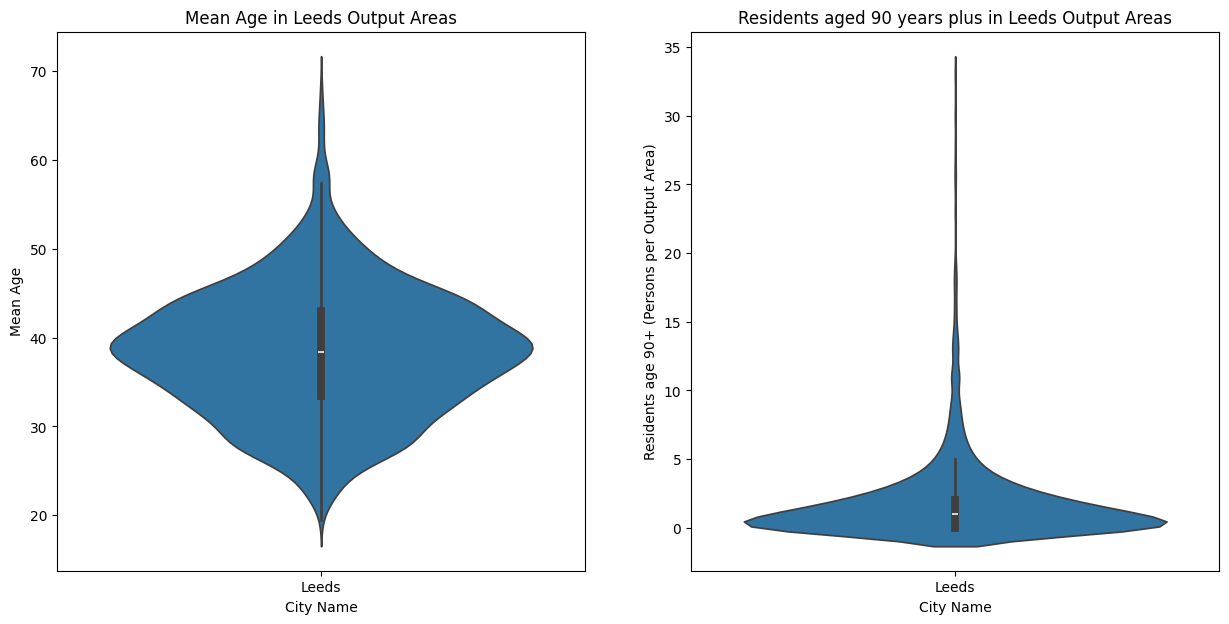

In [13]:
# Plot two violin plots to visualse the data
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 7))

#Plot 1 - Createa violin plot showing Mean Age across Leeds LSOAs
sns.violinplot(data = age, x ='City_name', y ='Mean_Age', ax = axes[0]).set_title('Mean Age in Leeds Output Areas')
#Plot 2 - Create a violin plot showing residents per Leeds LSOA 90+
sns.violinplot(data = age, x ='City_name', y ='90_plus', ax = axes[1]).set_title('Residents aged 90 years plus in Leeds Output Areas')

#Set x and y lables
#Plot 1
axes[0].set_ylabel('Mean Age')
axes[0].set_xlabel('City Name')
#Plot 2
axes[1].set_ylabel('Residents age 90+ (Persons per Output Area)')
axes[1].set_xlabel('City Name')

# Show the plot
plt.show()

Initial visualisation of the data uses a violin plot to show the distribution of ages across Leeds OAs showing that the majority of OAs have a mean age of 35-45 with and mean of 0-2 persons aged over 90. Plotting the data helps to provide context to the overall project.

***Joining datasets***

In [14]:
# Join the new leeds_data and age dataset on 'area_code'
leeds_data = pd.merge(vehicles, age, on='area_code')

In [15]:
# Check that the join has worked correctly
# 2543 rows and 12 columns
leeds_data

City_name_x  area_code  All-available_cars  no_cars  Perc_no_car  \
0          Leeds  E00056750                 141       35         24.8   
1          Leeds  E00056751                 110       14         12.7   
2          Leeds  E00056752                 200       31         15.5   
3          Leeds  E00056753                 141       66         46.8   
4          Leeds  E00056754                 131       28         21.4   
...          ...        ...                 ...      ...          ...   
2538       Leeds  E00170623                  85       31         36.5   
2539       Leeds  E00170887                 103       13         12.6   
2540       Leeds  E00170888                 116        6          5.2   
2541       Leeds  E00170889                 160       16         10.0   
2542       Leeds  E00170890                 102       20         19.6   

      sum_all_in_area City_name_y  All_usual  75_84  85_89  90_plus  Mean_Age  
0                 158       Leeds        279     20      5        2      41.7  
1                 162       Leeds        296     15      0        1      37.3  
2                 249       Leeds        407     31      5        3      41.8  
3                  84       Leeds        246     46     26       13      58.5  
4                 141       Leeds        272     10      4        0      37.4  
...               ...         ...        ...    ...    ...      ...       ...  
2538               71       Leeds        150      5      0        0      34.7  
2539              151       Leeds        259      1      1        0      27.0  
2540              173       Leeds        270      0      0        0      30.8  
2541              260       Leeds        394     32      7        8      45.3  
2542              104       Leeds        213      0      0        0      28.7  

[2543 rows x 12 columns]

Datasets are merged on the common column, this new dataset will be useful for data analysis and spatial joins.

***Calculate total elderly percentage***

In [16]:
# Calculate the percentage of elderly residents from the all usual population
# Add all ages columns together to create a new column called total age
leeds_data['total_elderly'] = leeds_data['75_84']+ leeds_data['85_89']+ leeds_data['90_plus']

In [17]:
# Calculate the percentage elderly population from the total elderly and all usual
leeds_data['total_elderly_perc'] = leeds_data['total_elderly'] / leeds_data['All_usual']*100

In [18]:
# Veiw the joined leeds data set to show that extra columns have been added
leeds_data

City_name_x  area_code  All-available_cars  no_cars  Perc_no_car  \
0          Leeds  E00056750                 141       35         24.8   
1          Leeds  E00056751                 110       14         12.7   
2          Leeds  E00056752                 200       31         15.5   
3          Leeds  E00056753                 141       66         46.8   
4          Leeds  E00056754                 131       28         21.4   
...          ...        ...                 ...      ...          ...   
2538       Leeds  E00170623                  85       31         36.5   
2539       Leeds  E00170887                 103       13         12.6   
2540       Leeds  E00170888                 116        6          5.2   
2541       Leeds  E00170889                 160       16         10.0   
2542       Leeds  E00170890                 102       20         19.6   

      sum_all_in_area City_name_y  All_usual  75_84  85_89  90_plus  Mean_Age  \
0                 158       Leeds        279     20      5        2      41.7   
1                 162       Leeds        296     15      0        1      37.3   
2                 249       Leeds        407     31      5        3      41.8   
3                  84       Leeds        246     46     26       13      58.5   
4                 141       Leeds        272     10      4        0      37.4   
...               ...         ...        ...    ...    ...      ...       ...   
2538               71       Leeds        150      5      0        0      34.7   
2539              151       Leeds        259      1      1        0      27.0   
2540              173       Leeds        270      0      0        0      30.8   
2541              260       Leeds        394     32      7        8      45.3   
2542              104       Leeds        213      0      0        0      28.7   

      total_elderly  total_elderly_perc  
0                27            9.677419  
1                16            5.405405  
2                39             9.58231  
3                85           34.552846  
4                14            5.147059  
...             ...                 ...  
2538              5            3.333333  
2539              2            0.772201  
2540              0                 0.0  
2541             47           11.928934  
2542              0                 0.0  

[2543 rows x 14 columns]

This columns will help visualise the distribution of elderly people aged 75+<a href="#ref3">[3]</a> spatially in relation to flood risk to identify vulnerable communities.

***Create a ageing population flag***

In [19]:
# Create a health flag showing 'healthy' where bristol healthy_perc >80 = TRUE and 'unhealthy' where bristol healthy_perc >80 = FALSE
leeds_data['Age_flag'] = np.where(leeds_data['total_elderly_perc']> 25,'Aging', 'Not Aging')

In [20]:
# Check that the new column has successfully been created
leeds_data

City_name_x  area_code  All-available_cars  no_cars  Perc_no_car  \
0          Leeds  E00056750                 141       35         24.8   
1          Leeds  E00056751                 110       14         12.7   
2          Leeds  E00056752                 200       31         15.5   
3          Leeds  E00056753                 141       66         46.8   
4          Leeds  E00056754                 131       28         21.4   
...          ...        ...                 ...      ...          ...   
2538       Leeds  E00170623                  85       31         36.5   
2539       Leeds  E00170887                 103       13         12.6   
2540       Leeds  E00170888                 116        6          5.2   
2541       Leeds  E00170889                 160       16         10.0   
2542       Leeds  E00170890                 102       20         19.6   

      sum_all_in_area City_name_y  All_usual  75_84  85_89  90_plus  Mean_Age  \
0                 158       Leeds        279     20      5        2      41.7   
1                 162       Leeds        296     15      0        1      37.3   
2                 249       Leeds        407     31      5        3      41.8   
3                  84       Leeds        246     46     26       13      58.5   
4                 141       Leeds        272     10      4        0      37.4   
...               ...         ...        ...    ...    ...      ...       ...   
2538               71       Leeds        150      5      0        0      34.7   
2539              151       Leeds        259      1      1        0      27.0   
2540              173       Leeds        270      0      0        0      30.8   
2541              260       Leeds        394     32      7        8      45.3   
2542              104       Leeds        213      0      0        0      28.7   

      total_elderly  total_elderly_perc   Age_flag  
0                27            9.677419  Not Aging  
1                16            5.405405  Not Aging  
2                39             9.58231  Not Aging  
3                85           34.552846      Aging  
4                14            5.147059  Not Aging  
...             ...                 ...        ...  
2538              5            3.333333  Not Aging  
2539              2            0.772201  Not Aging  
2540              0                 0.0  Not Aging  
2541             47           11.928934  Not Aging  
2542              0                 0.0  Not Aging  

[2543 rows x 15 columns]

Create health flag <a href="#ref4">[4]</a> variables that can be plotted in the final visualisation to show OAs with aging populations.

***Correlation Matrix***

In [21]:
# Create a subset for the correlation matrix plot
leeds_corr_sub = leeds_data[['no_cars', 'Mean_Age', 'total_elderly_perc', 'All-available_cars']]

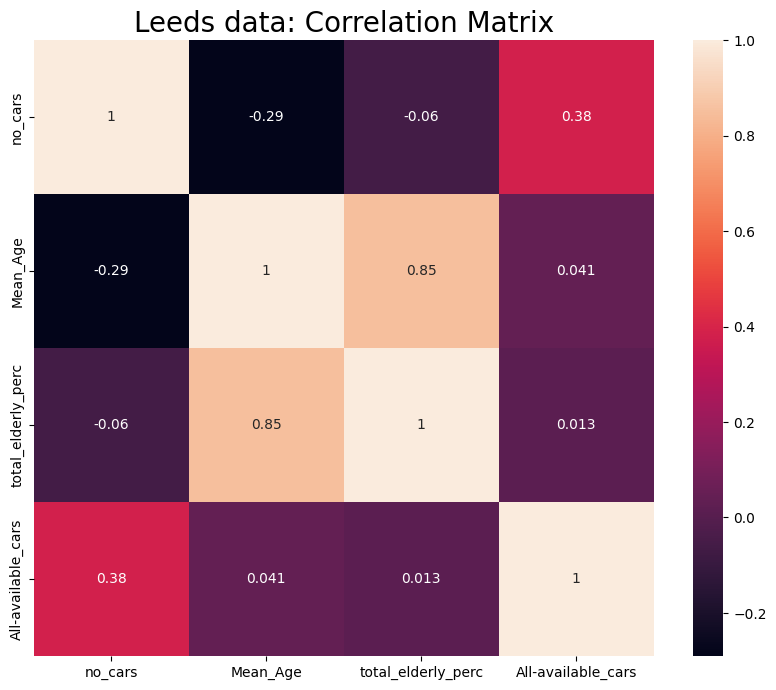

In [22]:
# Fit the correlation matrix to the leeds correlation subset
correlation_matrix = leeds_corr_sub.corr()

# Create the heatmap, set the figure size to 10x8
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot=True)

# Plot a title, increase the fontsize for visual clarity
plt.title('Leeds data: Correlation Matrix', fontsize = 20)

# Show the plot
plt.show()

Correlation matrix helps to visualise correlation coefficients between variables and checks for multicollinearity (coefficients <0.9) before regression analysis.

***Statistical model - OLS Regression***

In [23]:
# Define independent and dependent variables
X = leeds_data['Mean_Age']  # Independent variable
y = leeds_data['no_cars']  # Dependent variable (Does the number of households with no car change as mean age increases/decreases).

# Add a constant (intercept) to the independent variable (Mean_Age).
X = sm.add_constant(X)

In [24]:
ols_model = sm.OLS(y, X).fit() # Fit the OLS regression model.

In [25]:
# OLS regression summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                no_cars   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     234.2
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           1.25e-50
Time:                        12:27:31   Log-Likelihood:                -12035.
No. Observations:                2543   AIC:                         2.407e+04
Df Residuals:                    2541   BIC:                         2.409e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0604      2.968     28.661      0.0

The regression shows that the model fit is weak R2 = 0.0084, however the correlation between the two variables is statistically significant (p-value <0.05) with a ‘Mean_Age’ coefficient of -1.17 showing that for every 1 year increase in mean age, the number of households with no cars increases by 1.17 per OA.

***Create a data subset for non-spatial visualisation***

In [26]:
# Create a new subset contain data needed for non-spatial visualisation
leeds_sub =leeds_data[['no_cars', 'Mean_Age', 'Age_flag', 'area_code', 'total_elderly_perc', 'Perc_no_car']]

In [27]:
# Veiw the leeds data subset
# 2543 x 6 columns
leeds_sub

no_cars  Mean_Age   Age_flag  area_code  total_elderly_perc  Perc_no_car
0          35      41.7  Not Aging  E00056750            9.677419         24.8
1          14      37.3  Not Aging  E00056751            5.405405         12.7
2          31      41.8  Not Aging  E00056752             9.58231         15.5
3          66      58.5      Aging  E00056753           34.552846         46.8
4          28      37.4  Not Aging  E00056754            5.147059         21.4
...       ...       ...        ...        ...                 ...          ...
2538       31      34.7  Not Aging  E00170623            3.333333         36.5
2539       13      27.0  Not Aging  E00170887            0.772201         12.6
2540        6      30.8  Not Aging  E00170888                 0.0          5.2
2541       16      45.3  Not Aging  E00170889           11.928934         10.0
2542       20      28.7  Not Aging  E00170890                 0.0         19.6

[2543 rows x 6 columns]

# **`Final Non-Spatial Data Visualisation`**

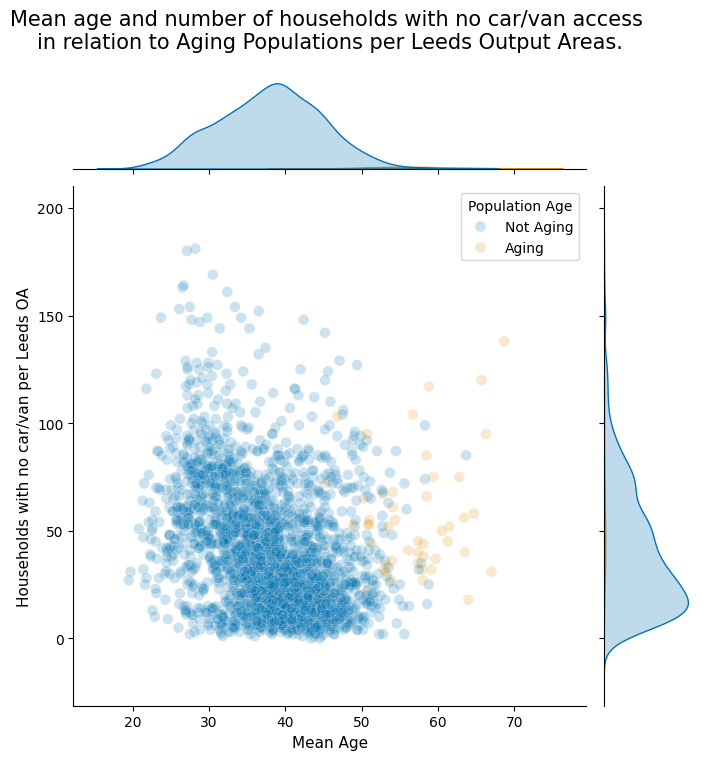

In [28]:
# Create a non-spatial visualisation of the leeds subset
# Set the data to leeds sub, x as mean age  and y as no cars
# Change the marker shape, palette to colourblind, hue to show the age flag per OA and increase the size to 60
sns.jointplot(data = leeds_sub, x = 'Mean_Age', y = 'no_cars', marker ='o', palette = "colorblind", alpha=0.2,  hue ='Age_flag', height = 7, s = 60)

plt.title('Mean age and number of households with no car/van access \n'
'in relation to Aging Populations per Leeds Output Areas.', y= 1.25, fontsize = 15) # Plot the title, split it onto two lines, move the title above the map to avoid overlap and increase fontsize


# Add x and y labels increasing the fontsize to 11
plt.xlabel('Mean Age', fontsize=11)
plt.ylabel('Households with no car/van per Leeds OA', fontsize=11)

# Change the tile of the legend so it is easily understandable
plt.legend(title = 'Population Age')

# Show the plot
plt.show()

This final plot is aimed at local government officials to help identify vulnerable populations which may be isolated during flood events. Statistical analysis shows that as mean age increases, the number of households with access to a car/van decreases. This plot will help create targeted aid plans for the most vulnerable communities such as elderly people without access to private transport when major flooding occurs<a href="#ref5">[5]</a>.

A joint plot is created to display mean age in relation to households with no car access per OA grouped by population age classification.  A joint plot was used to visualise data relationship patterns on a scatter plot with a kernel density plot used to show point density. Markers are coloured by age flag to identify OA populations with a high percentage of elderly residents, a colour blind friendly palette is used to improve plot accessibility <a href="#ref6">[6]</a>. Marker size is increased and opacity is decreased to identify areas with a higher point density.

To increase clarity, the title font size is increased as well as the x/y labels, helping to show exactly which data is being visualised and the spatial scale (output areas), the title is moved up on the y axis to avoid overlap.  The overall size of the plot is increased by changing the height of the graph, this makes data patterns easy to identify which is essential for effective local government planning.



# **Spatial: Data Description, Statistics and Wrangling**

In [29]:
# Install and Install Packages needed for Spatial Visualisation
!pip install contextily
!pip install geoplot
!pip install git+https://github.com/pmdscully/geo_northarrow.git
!pip install mapclassify
!pip install geodatasets
!pip install matplotlib-scalebar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 79.2 MB/s eta 0:00:00
  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-p4stp7xe
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-p4stp7xe
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit c530ad3f9558d05355543e9fe7671f26cd0ffa02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geo_northarrow: filename=geo_northarrow-0.2.0a0-py3-none-any.whl size=14938 sha256=64625ee02151aa8d7450f9fbfdf6b176cdd67a86a426d7150bc139c408af68f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-kou8pgoc/wheels/d7/28/6c/cb006605c19bc4f58db715626f7113a6858d8c002e8c52fa80
Successfully built geo_northarrow


In [30]:
import geopandas as gpd
import geodatasets
from geo_northarrow import add_north_arrow
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
import mapclassify
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [31]:
# Load in data needed for Spatial Visualisation

leeds = gpd.read_file('OA_2011_EW_BFC.shp') # Load in shp containing Leeds LSOAs
poi = gpd.read_file('poi_6248835.gpkg') # Load in the gpkg data containing poi data using geopandas
leeds_rivers = gpd.read_file('leeds_rivers.gpkg') # Load in shp containing watercourselink shapefile

***Data Description: Leeds Shapefile***

In [32]:
# Veiw the Leeds shapefile data
# 2543 rows × 6 columns
# Check for common join column (OA11CD contains output area codes)
leeds

OA11CD    LAD11CD    LAD16CD LAD16NM  \
0     E00056750  E08000035  E08000035   Leeds   
1     E00056751  E08000035  E08000035   Leeds   
2     E00056752  E08000035  E08000035   Leeds   
3     E00056753  E08000035  E08000035   Leeds   
4     E00056754  E08000035  E08000035   Leeds   
...         ...        ...        ...     ...   
2538  E00170623  E08000035  E08000035   Leeds   
2539  E00170887  E08000035  E08000035   Leeds   
2540  E00170888  E08000035  E08000035   Leeds   
2541  E00170889  E08000035  E08000035   Leeds   
2542  E00170890  E08000035  E08000035   Leeds   

                                  GlobalID  \
0     e3a2c07f-79ba-4388-9313-6edf8514c99e   
1     3642adf9-0491-468b-b0b1-eb9190376193   
2     aed17af3-69ea-4e4b-84b8-bad9118fdc7a   
3     24b29a75-5037-42e3-bc9b-581cf5f1cf8b   
4     647246e6-1856-4faa-bb88-58dc99e8e1ac   
...                                    ...   
2538  4666285a-72b9-4b3b-a064-00c56f4f7bd0   
2539  b0621eaa-e986-4242-b9d2-889ba5851fab   
2540  975e67ac-4c5d-417e-80eb-a38a60807bb3   
2541  d938ad5b-76dc-4d1d-bb61-3baaa7190289   
2542  efc0655d-0b17-41d1-8c0c-ef8a68503150   

                                               geometry  
0     POLYGON ((420675.101 441465.476, 420674.348 44...  
1     POLYGON ((419790.406 441141.836, 419790.832 44...  
2     POLYGON ((420251.937 441467.716, 420251.597 44...  
3     POLYGON ((421132.508 441296.621, 421127.539 44...  
4     POLYGON ((421306.651 441017.719, 421304.313 44...  
...                                                 ...  
2538  POLYGON ((427621.656 432737.094, 427623.594 43...  
2539  POLYGON ((430998.061 427780.778, 430986.896 42...  
2540  POLYGON ((417620.03 443437.088, 417610.656 443...  
2541  POLYGON ((427088.502 443288.904, 427106.501 44...  
2542  POLYGON ((427862.965 432725.006, 427865.311 43...  

[2543 rows x 6 columns]

In [33]:
# Check for a Geometry column - needed so that non-spatial data can be joined and then plotted per output area
# 5 x 'object' columns and 1 x 'geometry'
leeds.dtypes

OA11CD        object
LAD11CD       object
LAD16CD       object
LAD16NM       object
GlobalID      object
geometry    geometry
dtype: object

In [34]:
# Check there are no missing values NaN
leeds.isna().sum()

OA11CD      0
LAD11CD     0
LAD16CD     0
LAD16NM     0
GlobalID    0
geometry    0
dtype: int64

In [35]:
# Check the CRS of the Leeds shapefile
# British National Grid (EPSG:27700) is preffered as it is projected using meters making it better for distance calculations
leeds.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

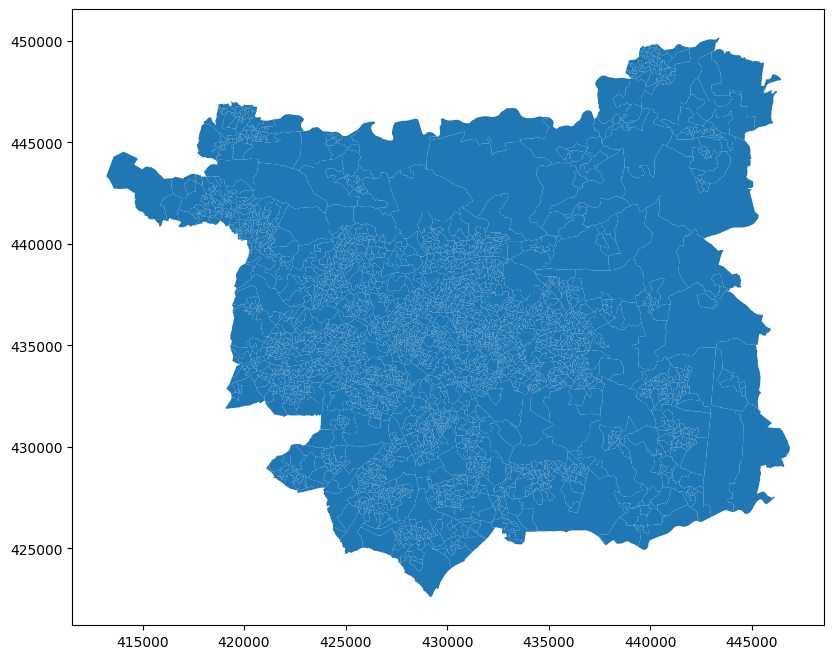

In [36]:
# Plot the Leeds Output Areas data to see what it looks like
# Define the number of plots and figure size
f, ax = plt.subplots(1, figsize=(10, 8))

# Plotting the Leeds shapefile data, specifying the subplot axis
leeds.plot(ax=ax)

# Show the plot
plt.show()

Data description insures a smooth join between csv data and shapefiles. The data types are viewed to check that the dataset contains an geometry column essential for spatial joins. The CRS is checked, EPSG:27700 uses meters and is therefore good for distance analysis used for buffer creation<a href="#ref7">[7]</a>.  Initial visualisation is done to check for missing polygon data.

***Data Description: POI data***

In [37]:
# View POI data showing the top 5 rows
poi.head(5)

ref_no          name pointx_class    groupname             categoryname  \
0  18694903        Statue     03170245  Attractions  Historical and Cultural   
1  17174954          Cave     03190257  Attractions       Landscape Features   
2  18254175  War Memorial     03170245  Attractions  Historical and Cultural   
3  18253053  War Memorial     03170245  Attractions  Historical and Cultural   
4  18253113  War Memorial     03170245  Attractions  Historical and Cultural   

                            classname  feature_easting  feature_northing  \
0  Historic and Ceremonial Structures         416131.0          432809.0   
1          Designated Scenic Features         417404.0          429553.0   
2  Historic and Ceremonial Structures         424288.0          437995.0   
3  Historic and Ceremonial Structures         415721.0          435961.0   
4  Historic and Ceremonial Structures         416558.0          440091.0   

   pos_accuracy  uprn  ... postcode     admin_boundary telephone_number   url  \
0             1   NaN  ...      BD5  Bradford District             None  None   
1             2   NaN  ...      BD4  Bradford District             None  None   
2             1   NaN  ...     LS18     Leeds District             None  None   
3             1   NaN  ...      BD2  Bradford District             None  None   
4             1   NaN  ...     BD17  Bradford District             None  None   

   brand qualifier_type qualifier_data       provenance supply_date  \
0   None           None           None  Ordnance Survey  2025-12-01   
1   None           None           None  Ordnance Survey  2025-12-01   
2   None           None           None  Ordnance Survey  2025-12-01   
3   None           None           None  Ordnance Survey  2025-12-01   
4   None           None           None  Ordnance Survey  2025-12-01   

                geometry  
0  POINT (416131 432809)  
1  POINT (417404 429553)  
2  POINT (424288 437995)  
3  POINT (415721 435961)  
4  POINT (416558 440091)  

[5 rows x 29 columns]

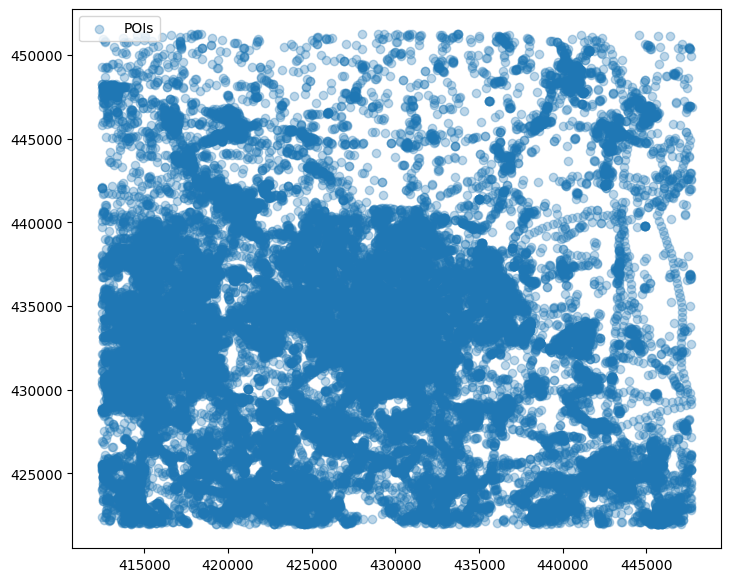

In [38]:
# Create 1 plot visualising the shape of the poi data setting the size to 11x7
f, ax = plt.subplots(1, figsize=(11, 7))

# Plot the point of interest data stating the subplot axis, give the data a label so it can easiliy be plotted as a legend, lower the opacity to 0.3
poi.plot(ax=ax, label = 'POIs', alpha= 0.3)

# Plot legend and give it a location eg.upper left
plt.legend(loc = 'upper left')

# Show the plot
plt.show()

Check the top 5 rows of the data to view column names, plot the data to visualise its initial shape.

***Data Description: Leeds Rivers***

In [39]:
# Veiw the leeds rivers data
# Contains 1 x Multlinestring
leeds_rivers

name1                            identifier  \
0  Carlton Beck  91E8A1B5-EF96-4845-9D09-018D590F339B   

                              startNode                               endNode  \
0  B7773CED-9A18-40DC-A455-3807EACECA1D  180A06EF-3FF5-4A35-9D28-0A7AF14D77B6   

          form          flow fictitious  length name2  \
0  inlandRiver  in direction      false    2192  None   

                                            geometry  
0  MULTILINESTRING Z ((413324.43 443462.54 0, 413...

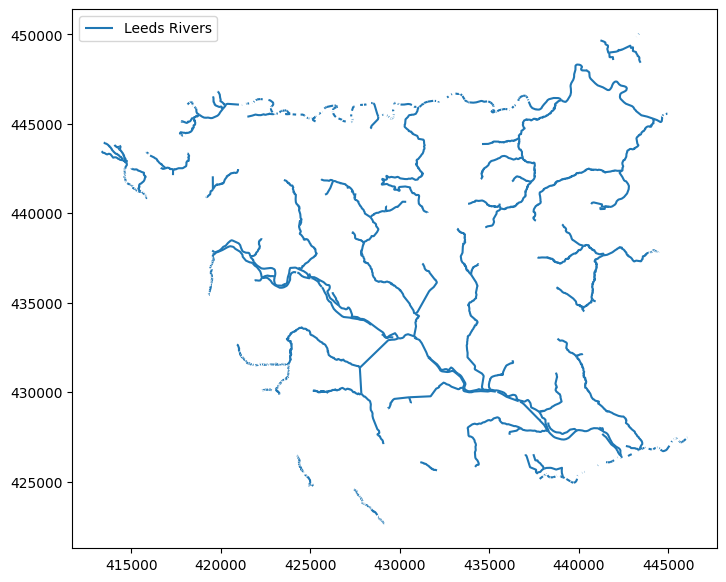

In [40]:
# Visualise the River network in Leeds
# Create 1 plot setting the size to 11x7
f, ax = plt.subplots(1, figsize=(11, 7))

# Plot the point data stating the subplot axis, give the data a label so it can easiliy be plotted as a legend
leeds_rivers.plot(ax=ax, label = 'Leeds Rivers')

# Plot legend and give it a location eg.upper left
plt.legend(loc = 'upper left')

# Show the plot
plt.show()

Check the geopackage contains a geometry file and visualise the shape of Leeds waterways.

***Joining datasets***

In [41]:
# Rename the area code column in the leeds sub to OA11CD so that the spatial data can be joined
leeds_sub = leeds_sub.rename(columns={'area_code':'OA11CD'})

In [42]:
# Merge the two datasets together on the common OA11CD column, joining the non-spatial data on the left
leeds_spatial = leeds.merge(leeds_sub, on = 'OA11CD', how='left')

In [43]:
# Veiw the joined leeds spatial
leeds_spatial

OA11CD    LAD11CD    LAD16CD LAD16NM  \
0     E00056750  E08000035  E08000035   Leeds   
1     E00056751  E08000035  E08000035   Leeds   
2     E00056752  E08000035  E08000035   Leeds   
3     E00056753  E08000035  E08000035   Leeds   
4     E00056754  E08000035  E08000035   Leeds   
...         ...        ...        ...     ...   
2538  E00170623  E08000035  E08000035   Leeds   
2539  E00170887  E08000035  E08000035   Leeds   
2540  E00170888  E08000035  E08000035   Leeds   
2541  E00170889  E08000035  E08000035   Leeds   
2542  E00170890  E08000035  E08000035   Leeds   

                                  GlobalID  \
0     e3a2c07f-79ba-4388-9313-6edf8514c99e   
1     3642adf9-0491-468b-b0b1-eb9190376193   
2     aed17af3-69ea-4e4b-84b8-bad9118fdc7a   
3     24b29a75-5037-42e3-bc9b-581cf5f1cf8b   
4     647246e6-1856-4faa-bb88-58dc99e8e1ac   
...                                    ...   
2538  4666285a-72b9-4b3b-a064-00c56f4f7bd0   
2539  b0621eaa-e986-4242-b9d2-889ba5851fab   
2540  975e67ac-4c5d-417e-80eb-a38a60807bb3   
2541  d938ad5b-76dc-4d1d-bb61-3baaa7190289   
2542  efc0655d-0b17-41d1-8c0c-ef8a68503150   

                                               geometry  no_cars  Mean_Age  \
0     POLYGON ((420675.101 441465.476, 420674.348 44...       35      41.7   
1     POLYGON ((419790.406 441141.836, 419790.832 44...       14      37.3   
2     POLYGON ((420251.937 441467.716, 420251.597 44...       31      41.8   
3     POLYGON ((421132.508 441296.621, 421127.539 44...       66      58.5   
4     POLYGON ((421306.651 441017.719, 421304.313 44...       28      37.4   
...                                                 ...      ...       ...   
2538  POLYGON ((427621.656 432737.094, 427623.594 43...       31      34.7   
2539  POLYGON ((430998.061 427780.778, 430986.896 42...       13      27.0   
2540  POLYGON ((417620.03 443437.088, 417610.656 443...        6      30.8   
2541  POLYGON ((427088.502 443288.904, 427106.501 44...       16      45.3   
2542  POLYGON ((427862.965 432725.006, 427865.311 43...       20      28.7   

       Age_flag  total_elderly_perc  Perc_no_car  
0     Not Aging            9.677419         24.8  
1     Not Aging            5.405405         12.7  
2     Not Aging             9.58231         15.5  
3         Aging           34.552846         46.8  
4     Not Aging            5.147059         21.4  
...         ...                 ...          ...  
2538  Not Aging            3.333333         36.5  
2539  Not Aging            0.772201         12.6  
2540  Not Aging                 0.0          5.2  
2541  Not Aging           11.928934         10.0  
2542  Not Aging                 0.0         19.6  

[2543 rows x 11 columns]

In [44]:
#Check that there are no NaN values
leeds_spatial.isna().sum()

OA11CD                0
LAD11CD               0
LAD16CD               0
LAD16NM               0
GlobalID              0
geometry              0
no_cars               0
Mean_Age              0
Age_flag              0
total_elderly_perc    0
Perc_no_car           0
dtype: int64

Join the datasets together allowing for the spatial visualisation of csv demographic data.

***Filtering POI data - Clinics and Health Centres***

In [45]:
# Filter the poi data by admin boundary to include data from Leeds district
leeds_poi = poi[poi['admin_boundary'] == 'Leeds District']

In [46]:
# Filter the leeds poi data by classname to include CLinics and health centres
leeds_healthcare = leeds_poi[leeds_poi['classname'] == 'Clinics and Health Centres']

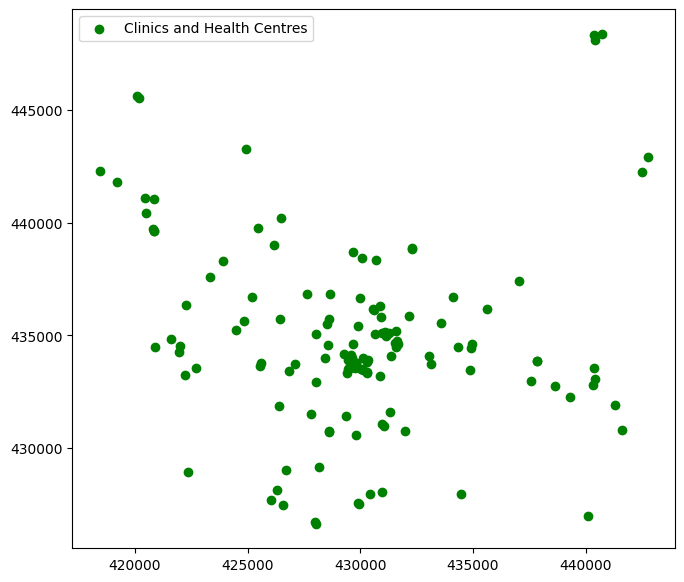

In [47]:
# Create 1 plot setting the size to 11x7
f, ax = plt.subplots(1, figsize=(11, 7))

# Plot the point data stating the subplot axis, give the data a label so it can easiliy be plotted as a legend, colour the points green
leeds_healthcare.plot(ax=ax, color ='green', label = 'Clinics and Health Centres')

# Plot legend and give it a location eg.upper left
plt.legend(loc = 'upper left')

# Show the plot
plt.show()

POIs are filtered to only contain data needed for spatial visualisation this allows for the initial spatial visualisation and improves clarity when visualising data to avoid human error.

***Filtering POI data - Railway Stations, Junctions and Halts***

In [48]:
leeds_rail = leeds_poi[leeds_poi['classname'] == 'Railway Stations, Junctions and Halts']

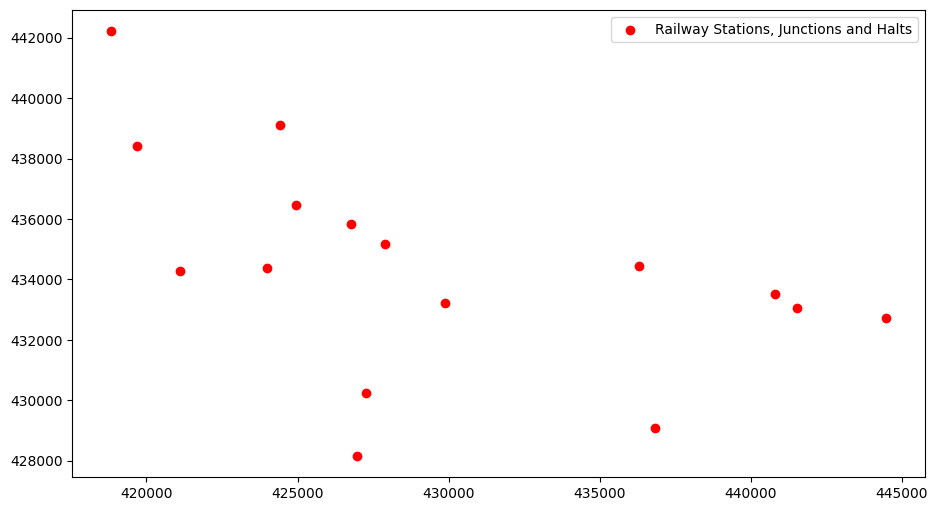

In [49]:
# Create 1 plot setting the size to 11 x 7
f, ax = plt.subplots(1, figsize=(11, 7))

# Plot the point data stating the subplot axis, give the data a label so it can easiliy be plotted as a legend, colour the points red
leeds_rail.plot(ax=ax, color ='red', label = 'Railway Stations, Junctions and Halts')

# Plot legend and give it a location eg.upper left
plt.legend(loc = 'upper right')

# Show the plot
plt.show()

***Create a 300 meter buffer***

In [50]:
# Using the buffer function create a 300m buffer around the river shapefile
river_buffer_200 = leeds_rivers.buffer(200)

In [51]:
# Veiw the buffer
river_buffer_200

0    MULTIPOLYGON (((419127.96 435474.477, 419127.3...
dtype: geometry

In [52]:
# Convert the buffer from a GeoSeries (just geometries) to a Geodataframe (geometries and attributes)
river_buffer_200 = river_buffer_200.to_frame(name= 'geometry')

In [53]:
# Veiw that the conversion worked correctly
# GeoDataFrames are needed for spatial analysis
river_buffer_200

geometry
0  MULTIPOLYGON (((419127.96 435474.477, 419127.3...

A buffer of 200m is added to the river shapefile to represent future flooding from exceeded river water capacity in line with climate  RCP 8.5<a href="#ref8">[8]</a>, the buffer is converted into a GeoDataframe so that spatial analysis can occur.

***Clip the buffer to the Leeds Shapefile***

In [54]:
# Clip the river buffer using the geopandas overlay function
# Clip the river buffer to the shape of the leeds_spatial data set
clipped_buffer = gpd.overlay(river_buffer_200, leeds_spatial, how='intersection') # How = intersection returns a dataframe only containing overlapping geomerty (Copilot, 2026).

In [55]:
# Veiw the clipped buffer - containing overlapped geometry in the geometry column
clipped_buffer

OA11CD    LAD11CD    LAD16CD LAD16NM  \
0    E00056751  E08000035  E08000035   Leeds   
1    E00056752  E08000035  E08000035   Leeds   
2    E00056762  E08000035  E08000035   Leeds   
3    E00056764  E08000035  E08000035   Leeds   
4    E00056765  E08000035  E08000035   Leeds   
..         ...        ...        ...     ...   
757  E00170617  E08000035  E08000035   Leeds   
758  E00170620  E08000035  E08000035   Leeds   
759  E00170621  E08000035  E08000035   Leeds   
760  E00170888  E08000035  E08000035   Leeds   
761  E00170889  E08000035  E08000035   Leeds   

                                 GlobalID  no_cars  Mean_Age   Age_flag  \
0    3642adf9-0491-468b-b0b1-eb9190376193       14      37.3  Not Aging   
1    aed17af3-69ea-4e4b-84b8-bad9118fdc7a       31      41.8  Not Aging   
2    16499311-daec-4a69-9cc2-8766aa33dfc8       12      35.7  Not Aging   
3    62c335cc-b535-4408-9db0-c72f0bc6e113        5      40.9  Not Aging   
4    99218479-e5a3-432b-b4a0-454b01352d1d       17      43.9  Not Aging   
..                                    ...      ...       ...        ...   
757  fd681414-1f17-4025-996c-45a3c55f21ab       71      28.9  Not Aging   
758  da205ae4-6a89-475d-9e1c-be8b96a5ecc4       78      29.5  Not Aging   
759  f1f60085-0198-4659-a52d-b11290a9dfb4       38      36.8  Not Aging   
760  975e67ac-4c5d-417e-80eb-a38a60807bb3        6      30.8  Not Aging   
761  d938ad5b-76dc-4d1d-bb61-3baaa7190289       16      45.3  Not Aging   

     total_elderly_perc  Perc_no_car  \
0              5.405405         12.7   
1               9.58231         15.5   
2              4.979253          6.5   
3              5.121294          3.6   
4             10.526316         10.9   
..                  ...          ...   
757            0.406504         46.4   
758            0.436681         51.3   
759           11.111111         41.3   
760                 0.0          5.2   
761           11.928934         10.0   

                                              geometry  
0    POLYGON ((419669.377 441157.044, 419656.921 44...  
1    MULTIPOLYGON (((420194.777 441480.829, 420177....  
2    POLYGON ((417958.263 443035.562, 417970.566 44...  
3    POLYGON ((417979.664 442354.936, 417963.702 44...  
4    MULTIPOLYGON (((418163.348 442468.829, 418139....  
..                                                 ...  
757  POLYGON ((430744.568 433149.396, 430719 433097...  
758  POLYGON ((430530.929 433002.499, 430489.681 43...  
759  POLYGON ((428435.777 436209.977, 428428.073 43...  
760  POLYGON ((416481.73 443219.912, 416499.949 443...  
761  POLYGON ((426842.971 441439.865, 426839.045 44...  

[762 rows x 11 columns]

<Axes: >

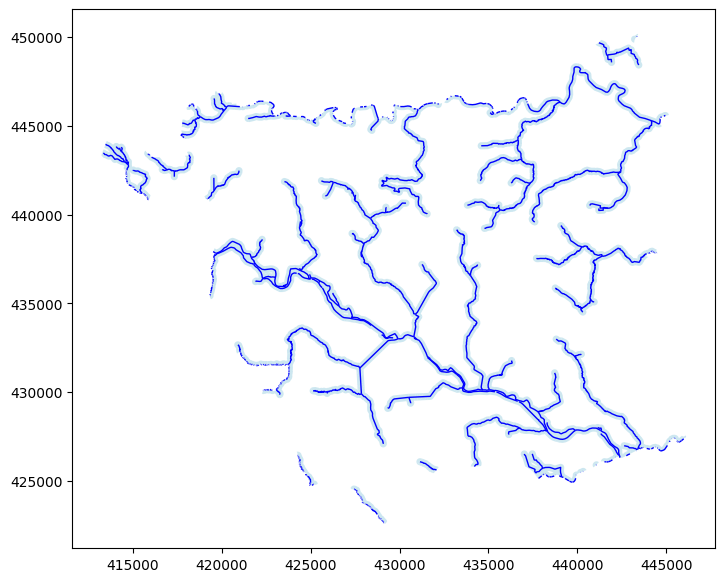

In [56]:
# Plot the buffer and the original river shapefile
fig, ax = plt.subplots(figsize=(11, 7))

# Plot buffer (light blue polygon) set edgecolor to none
clipped_buffer.plot(ax=ax, color='lightblue', alpha=0.6, edgecolor='none', label='200m Buffer')

# Plot track (blue line)
leeds_rivers.plot(ax=ax, color='blue', linewidth=1, label='Leeds Rivers')

The buffer is clipped to the shape of the Leeds polygon to create a clear and representative plot, the buffer can then be visualised before being added to the final plot.

# **`Final Spatial Data Visualisation`**

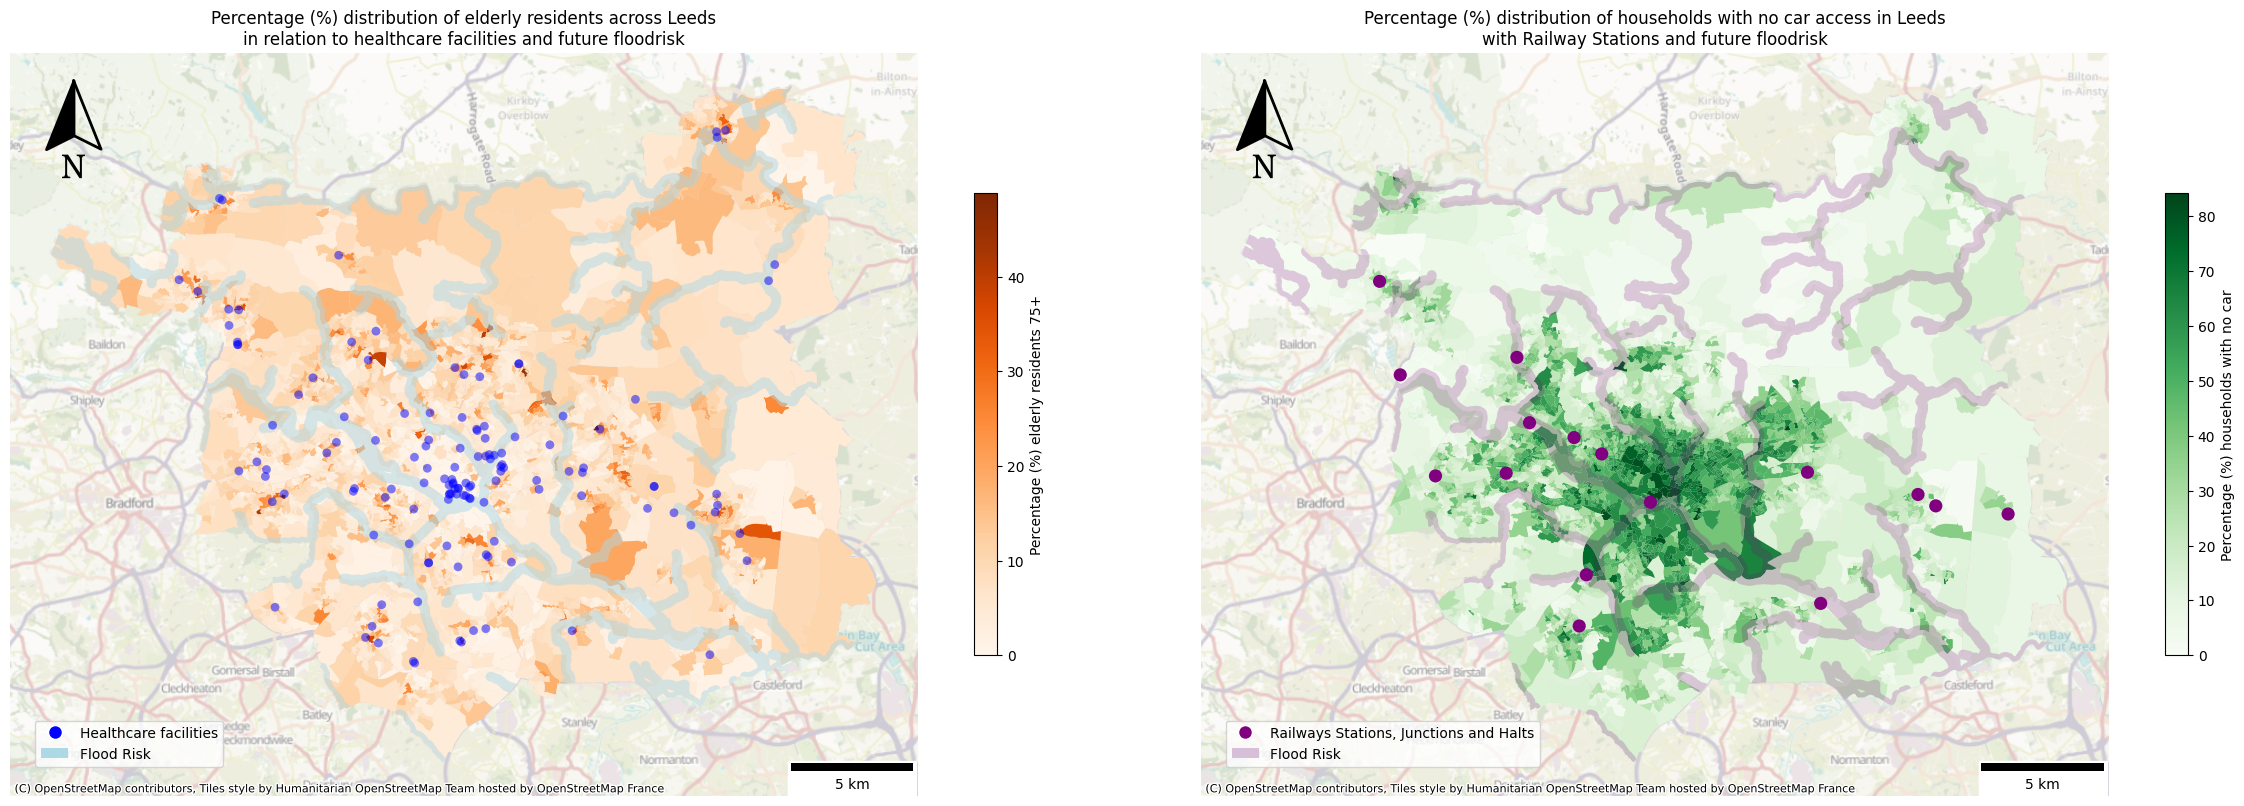

In [57]:
# Plot data, set up the figure to have 1 row and 2 columns, increase the figure size to 30x20
fig, ax = plt.subplots(1, 2, figsize=(30, 20))
# Adjust the space left inbetween both plots, decrease it to 0.05
plt.subplots_adjust(wspace =0.05)

# Plot1
# Set the base to the leeds spatial data showing elderly people distribution across leeds setting the choropleth colour ramp to BuGn
# Shrink the legend to 0.3 and add a label adding the units (%)
base = leeds_spatial.plot(ax = ax[0], column = 'total_elderly_perc', cmap = 'Oranges', legend = True, legend_kwds={'shrink': 0.3, 'label': 'Percentage (%) elderly residents 75+'})
# Plot the healthcare data, colouring them red, opacity of 0.4, no edgecolor, size 40, position above the buffer
leeds_healthcare.plot(ax=ax[0], color='blue', alpha = 0.5, edgecolor='none',  markersize=40, zorder = 10)
# Plot buffer as a light blue polygon, opacity 0.5, no edgecolor, position under the markers
clipped_buffer.plot(ax=ax[0], color='lightblue', alpha=0.5, edgecolor='none', zorder = 5)
# Add a contextily basemap and set the opacity to 0.5
cx.add_basemap(ax[0], crs = 'EPSG:27700', alpha = 0.5)

# Set the title for plot 1 (axis [0]), using \n, split the title onto 2 lines instead of one so they do not overlap
ax[0].set_title('Percentage (%) distribution of elderly residents across Leeds\n'
 'in relation to healthcare facilities and future floodrisk')
# Add a north arrow positioning it on the plot 1 axis and moving it so that is in the top left of the map, set the text size and scale
add_north_arrow(ax=ax[0], xlim_pos=0.07, ylim_pos=.87, text_scaler=2.5, text_yT=-1.25, scale=.75)
# Add a scale bar set the pixel size to equal 1m, set the location to lower right
scalebar = ScaleBar(1, location = 'lower right')
# Plot the scale bar on the correct axis
ax[0].add_artist(scalebar)
# Turn the axis off as to not distract from displayed data
ax[0].set_axis_off()

# Using matplotlib, create a seperate custom legend containing other plotted variables. (Copilot, 2026 - Suggested using matplotlib to help the creation of independent legend).
# Using the Line2D and Patch functions create a red dot marker with the label 'Healthcare facilities' set the size to 10 and set the placeholders to [0],[0].
# Create a lightblue patch labeled 'Flood Risk'
legend_variables = [Line2D([0], [0], marker='o', color='w', label='Healthcare facilities', markerfacecolor='blue', markersize=10), Patch(facecolor='lightblue', label='Flood Risk')]
# Plot the legend variables on plot 1 in the lower left, anchor the box in the correct position
ax[0].legend(handles=legend_variables, loc='lower left', bbox_to_anchor=(0.02, 0.03))



# Plot2
# Set the base to the leeds spatial data showing percentage of houshold with no cars across leeds setting the choropleth colour ramp to RdPu
# Shrink the legend and add a label
base = leeds_spatial.plot(ax = ax[1], column = 'Perc_no_car', cmap = 'Greens',legend = True, legend_kwds ={'shrink': 0.3, 'label':'Percentage (%) households with no car'})
leeds_rail.plot(ax=ax[1], color='purple', edgecolor='none',markersize=90, zorder =10) # Plot the healthcare data, colouring them purple, no edgecolor, size 90, plot above buffer
clipped_buffer.plot(ax=ax[1], color='purple', alpha=0.2, edgecolor='none', zorder=5) # Plot buffer as a light purple polygon, opacity 0.2, no edgecolor, plot below markers
cx.add_basemap(ax[1], crs = 'EPSG:27700', alpha = 0.5) # Add a contextily basemap and set the opacity to 0.5

# Set the title for plot 2 (axis [1]), using \n, split the title onto 2 lines instead of one so they do not overlap
ax[1].set_title('Percentage (%) distribution of households with no car access in Leeds\n'
 'with Railway Stations and future floodrisk')
# Add a north arrow positioning it on the plot 1 axis and moving it so that is in the top left of the map, set the text size and scale
add_north_arrow(ax=ax[1], xlim_pos=0.07, ylim_pos=.87, text_scaler=2.5, text_yT=-1.25, scale=.75)
scalebar = ScaleBar(1, location ='lower right') # Add a scale bar set the pixel size to equal 1m, set the location to lower right
ax[1].add_artist(scalebar) # Plot the scale bar on the correct axis
ax[1].set_axis_off() # Turn the axis off as to not distract from displayed data


# Create a seperate custom legend containing other plotted variables
# Using the Line2D and Patch functions create a purple dot marker with the label 'Healthcare facilities' set the size to 10 and set the placeholders to [0],[0].
legend_variables = [Line2D([0], [1], marker='o', color='w', label='Railways Stations, Junctions and Halts',
                          markerfacecolor='purple', markersize=10), Patch(facecolor='#D8BFD8', label='Flood Risk')] # Create a lightpurple patch labeled 'Flood Risk'
# Plot the legend variables on plot 1 in the lower left, anchor the box in the correct position
ax[1].legend(handles=legend_variables, loc = 'lower left', bbox_to_anchor=(0.02, 0.03))

# Plot the figure
plt.show()

The final spatial visualisation is for local government officials to present at a council planning meeting with Yorkshire Water and the Environment Agency. This map should therefore be extremely clear, pinpointing isolated communities so that flood mitigation strategies can be implemented and targeted aid strategies aimed at helping the most vulnerable people first can be designed.

The final figure displays 2 choropleth maps showing flood risk zones in relation to demographic data and related POIs. To aid visualisation, figure size was increased and white space between plots was reduced to minimise distraction. Both choropleths are plotted using colourblind friendly palettes, marker sizes where increased and POIs where ordered to appear above flood buffers to improve clarity. Opacity of markers and buffers was decreased so that choropleth values could still be seen, base map opacity was lowed to decrease distraction from presented data whilst still providing geographical context alongside scalebars and north arrows.

Clear legends where added to show exactly what data was included in each plot<a href="#ref9">[9]</a>, this is necessary for policy makers as they can make informed planning decisions based on truthful clearly displayed variables.


## References
<p><a href="https://www.researchgate.net/profile/Nikunj-Bhavsar-2/publication/393901480_Data_Wrangling_Preprocessing/links/6923d5d3abe27c41e514a4fc/Data-Wrangling-Preprocessing.pdf">[1]</a>Agal, S., 2025. Data Wrangling & Preprocessing.</p>
<p><a href="https://www.sciencedirect.com/science/article/pii/S2214367X22000333">[2]</a>Rasca, S. and Saeed, N., 2022. Exploring the factors influencing the use of public transport by commuters living in networks of small cities and towns. Travel Behaviour and Society, 28, pp.249-263.</p>
<p><a href="https://www.who.int/news-room/fact-sheets/detail/ageing-and-health">[3]</a>World Health Organisation, 2025</p>
<p><a href="https://assets.publishing.service.gov.uk/media/5d273adce5274a5862768ff9/future-of-an-ageing-population.pdf">[4]</a>Government Office for Science, 2016

<p><a href="https://onlinelibrary.wiley.com/doi/full/10.1111/jfr3.12908">[5]</a>Davis, L., Larionova, T., Patel, D., Tse, D., Baquedano Juliá, P., Pinto Santos, P. and Ferreira, T.M., 2023. Flood vulnerability and risk assessment of historic urban areas: Vulnerability evaluation, derivation of depth‐damage curves and cost–benefit analysis of flood adaptation measures applied to the historic city centre of Tomar, Portugal. Journal of Flood Risk Management, 16(3), p.e12908.

<p><a href="https://www.nceas.ucsb.edu/sites/default/files/2022-06/Colorblind%20Safe%20Color%20Schemes.pdf">[6]</a> Phillips, A.,2022, NCEAS Science Communication Resource Corner

<p><a href="https://epsg.io/27700">[7]</a> MapTiler, 2025

<p><a href="https://nora.nerc.ac.uk/id/eprint/537613/7/hess-2022-243.pdf">[8]</a>Griffin, A., Kay, A., Sayers, P., Bell, V., Stewart, E. and Carr, S., 2022. Widespread flooding dynamics changing under climate change: characterising floods using UKCP18. Hydrology & Earth System Sciences Discussions.

<p><a href="https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html">[9]</a> Matplotlib, 2026, Compose custom legends.

# Acknowledgements
"I acknowledge the use of Co-pilot (Microsoft Copilot, https://copilot.microsoft.com/, Accessed 2026-01-30) to give code suggestions for clipping the buffer to the Leeds shapefile. Prompt: How do I clip a multilinestring to the size of a shapefile".

"I acknowledge the use of Co-pilot (Microsoft Copilot, https://copilot.microsoft.com/, Accessed 2026-01-30) to give suggestions on how i can add my own legend. Prompt: How can I add a independent legend?".

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-fr

In [ ]:
!jupyter nbconvert --to pdf .ipynb